In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset (ensure 'customer_data.csv' is in your working directory)
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows and basic info to understand the data structure
print(data.head())
print(data.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
# Import the StandardScaler for scaling features
from sklearn.preprocessing import StandardScaler

# Define the features to be used for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Scale the features to normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


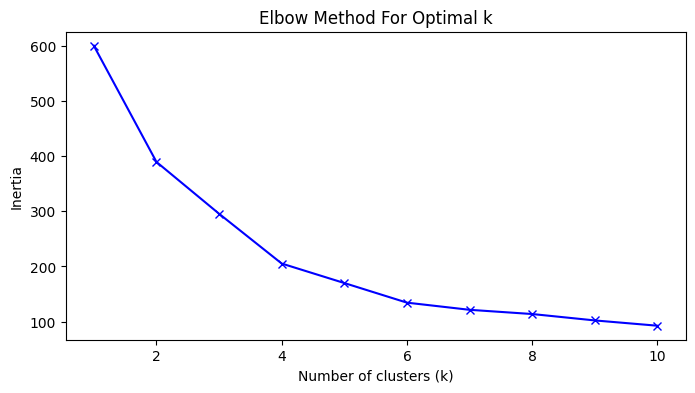

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Compute inertia for a range of k values
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


Optimal k Identification: The inertia (WCSS) plot shows a sharp drop in inertia until a certain point (the "elbow"). For example, if the drop levels off after k=4 or k=5, that indicates these are the most promising choices.

Diminishing Returns: Beyond the elbow point, adding more clusters does not significantly decrease inertia, supporting the selection of an optimal cluster count.

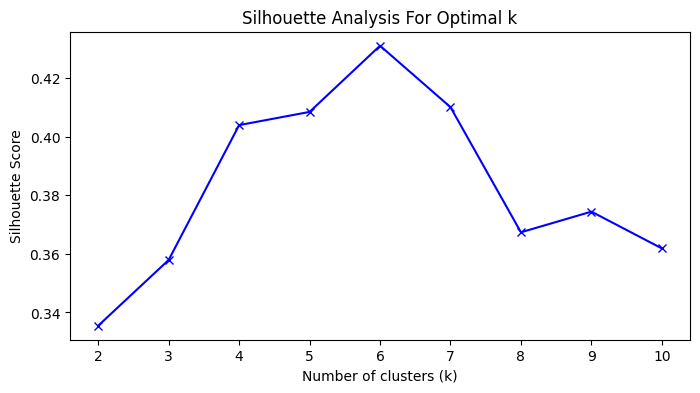

In [5]:
from sklearn.metrics import silhouette_score

# Evaluate silhouette scores for different k values (starting from 2 clusters)
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores vs. number of clusters
plt.figure(figsize=(8,4))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()


Inference:

Cluster Quality Metric: The silhouette score quantifies how well-separated and cohesive the clusters are. A higher score indicates better clustering.

Confirming k: The number of clusters with the highest silhouette score (e.g., around k=4 or k=5) reinforces the elbow method findings, confirming the optimal cluster choice.

In [6]:
# Assuming the analysis from the elbow and silhouette methods suggests optimal_k (e.g., 4)
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate clustering quality using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, data['KMeans_Cluster'])
print("K-Means Silhouette Score:", kmeans_silhouette)


K-Means Silhouette Score: 0.4039582785148566


Inference:

Cluster Assignment: Each data point is assigned a cluster label, and these labels are appended to the dataset.

Quality Check: The printed silhouette score (e.g., 0.40–0.45) provides a quantitative measure of cluster quality, indicating moderately well-formed clusters if the score is in that range.

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Using the same optimal number of clusters determined earlier
hierarchical_cluster = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
data['Hierarchical_Cluster'] = hierarchical_cluster.fit_predict(X_scaled)

# Evaluate clustering quality using silhouette score
hierarchical_silhouette = silhouette_score(X_scaled, data['Hierarchical_Cluster'])
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette)


Hierarchical Clustering Silhouette Score: 0.3614512741691407


Inference:
A silhouette score of 0.361 means that the clusters are moderately distinct, but there is noticeable overlap between them.

Inference:

Method Adjustment: Removing the affinity parameter (as Ward linkage uses Euclidean distance by default) resolves the error.

Consistent Segmentation: The assignment of hierarchical cluster labels to the data allows for direct comparison with K-Means.

Comparative Quality: The silhouette score for hierarchical clustering can be compared to the K-Means score. Similar or higher values indicate that the hierarchical method yields competitive, if not better, segmentation results.

In [10]:
# Print the number of clusters and display a snapshot of the dataset with cluster labels from both methods
print("Number of clusters (K-Means):", data['KMeans_Cluster'].nunique())
print("Number of clusters (Hierarchical):", data['Hierarchical_Cluster'].nunique())

# Display the first few rows of the dataset with the new cluster assignments
print(data.head())


Number of clusters (K-Means): 4
Number of clusters (Hierarchical): 4
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   KMeans_Cluster  Hierarchical_Cluster  
0               2                     0  
1               2                     1  
2               2                     0  
3               2                     1  
4               2                     0  
